1.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data with correct file path formatting
data = pd.read_csv("/content/drive/MyDrive/Concept and technolody of AI/data.csv")

# Display basic information
print(data.head())
print(data.info())

# Identify columns of object data type
object_columns = data.select_dtypes(include=['object']).columns
print("Object columns:", object_columns)

# Loop through object columns to analyze unique values and null counts
for col in object_columns:
    unique = data[col].unique()
    print(f"Unique values in '{col}': {unique}")
    ncount = data[col].isnull().sum()
    print(f"Column '{col}' has {ncount} missing values\n")

# Select numeric columns and save to new CSV
numeric_data = data.select_dtypes(exclude=['object'])
numeric_data.to_csv('banknumericdata.csv', index=False)

# Load the numeric-only data and summarize
numeric_summary_data = pd.read_csv('banknumericdata.csv')
summary = numeric_summary_data.describe()
print(summary)


           x          y
0  32.502345  31.707006
1  53.426804  68.777596
2  61.530358  62.562382
3  47.475640  71.546632
4  59.813208  87.230925
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
Object columns: Index([], dtype='object')
                x           y
count  100.000000  100.000000
mean    48.958341   72.735051
std      9.746379   16.658187
min     25.128485   31.707006
25%     41.526164   60.788586
50%     49.634970   72.179542
75%     56.762631   83.215080
max     70.346076  118.591217


2.

In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Concept and technolody of AI/Titanic-Dataset (1).csv')

# Select specific columns
selected_columns_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Filter rows for Pclass == 1
first_class_df = selected_columns_df[selected_columns_df['Pclass'] == 1]

# Calculate statistics for 'Fare'
fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()  # Avoid overriding Python built-in function names
fare_min = first_class_df['Fare'].min()

# Print statistics
print(f"Mean Fare: {fare_mean}")
print(f"Median Fare: {fare_median}")
print(f"Maximum Fare: {fare_max}")
print(f"Minimum Fare: {fare_min}")

# Count and drop null values in the 'Age' column
age_null_count = df['Age'].isnull().sum()
print(f"Null values in 'Age' column: {age_null_count}")
df = df.dropna(subset=['Age'])

# Create dummy variables for 'Embarked' and replace the original column
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

# Display the updated DataFrame
print(df.head())


Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0
Null values in 'Age' column: 177
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2

3.

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


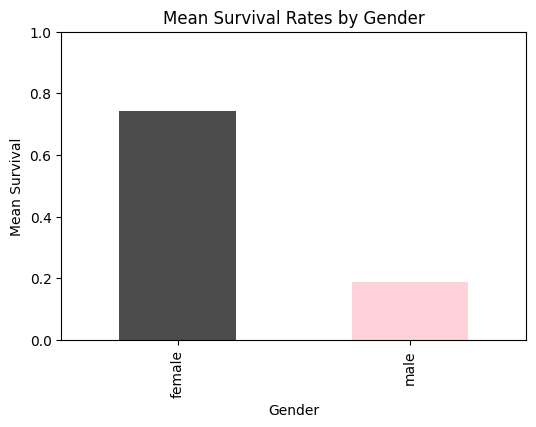

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


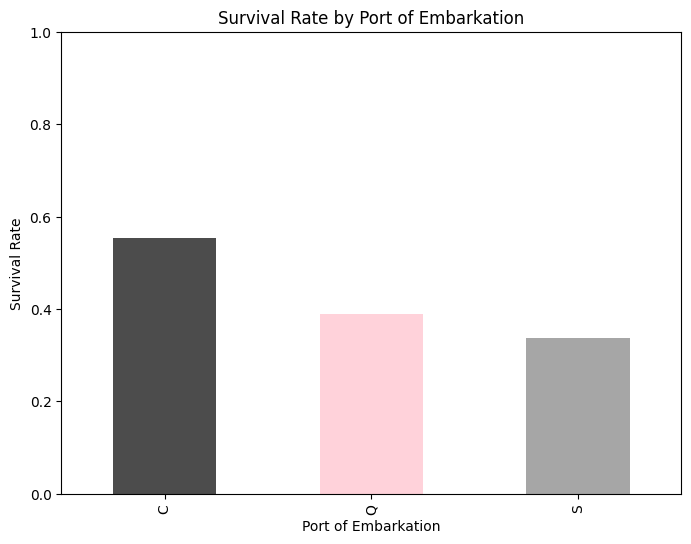

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/Concept and technolody of AI/Titanic-Dataset (1).csv')

# Calculate mean survival rates by gender
mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print(mean_survival_by_gender)

# Plot mean survival rates by gender
plt.figure(figsize=(6, 4))
mean_survival_by_gender.plot(kind='bar', color=['black', 'pink'], alpha=0.7)
plt.title('Mean Survival Rates by Gender')
plt.ylabel('Mean Survival')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.show()

# Calculate mean survival rates by port of embarkation
mean_survival_by_port = df.groupby('Embarked')['Survived'].mean()
print(mean_survival_by_port)

# Plot mean survival rates by port of embarkation
plt.figure(figsize=(8, 6))
mean_survival_by_port.plot(kind='bar', color=['black', 'pink', 'gray'], alpha=0.7)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()
